In [114]:
#Final edit: 20231220 17:00

# **Important notes**
Please follow the following naming role. Or the program would not function  normally

---

## 1. For Calcium imaging cell traces

**Raw calcium imaging file** should be named in this way: `XXXXXXXX animal_ID state.csv`. 

`state` could only be one of these options:
- `basal`
- `d1`
- `d3`
- `dn` (for n = certain integer, which should update the `f_state_match` dictionary before use)

**No other strings should be included before `.csv`**

## 2. For CPP trajectory

**Exported Trajectory Table** should be named in htis way: `XXXXXXXXX animal_ID state cpp.txt` 

`state` could only be one of these options:
- `basal`
- `d1`
- `d3`
- `dn` (for n = certain integer, which should update the `f_state_match` dictionary before use)

**No other strings should be included before `cpp.csv`**.
Use space between strings

# **Material importing, plot formatting, and other predefined parameters**
Run once at the beginning

---

In [5]:
import numpy as np
import pandas as pd 
import os 
import cpp_processing_script as cpp
from  importlib import reload
import pickle


In [6]:
formalin_side = {
'14499-1': 'R', '14558-1': 'R', '14558-2': 'R', '14548-2': 'L','14648-1': 'R', '14648-2': 'R'} 

    # aav rg ('14499-1': 'R', '14558-1': 'R', '14558-2': 'R', '14548-1': 'L', '14548-2': 'L')
    # CPP ( '13786-1': 'R','13786-2': 'R','14133-1': 'L','14142-1': 'L','14142-2': 'L','14142-3': 'R','14276-2': 'L')
    #('14499-1': 'R', '14558-1': 'R', '14558-2': 'R', '14548-2': 'L')

# **Analysis scripts start from here**
---

## **Read in calcium traces & trajectories**

#### **Edit this block**

In [7]:
#Type in the directory of folder with "Extracted trace file"
calciumpath = r"/Users/shihchelin/Desktop/Dr. Wei-Hsin Chen -  PVT Imaging Data analysis/Raw Data/CPP"

os.chdir(calciumpath)#For direct preprocessing 
file_list_Ca = [_ for _ in os.listdir(calciumpath) if _.endswith('.csv')]

data_Ca = pd.read_csv(file_list_Ca[0],header = None, low_memory = False).values

[cell_ID,cell_ID1] = [data_Ca[np.where(data_Ca[:,0] == 'Cell ID')[0].min(),1:] for i in range(2)]
[stimulus, stimulus1] =  [data_Ca[np.where(data_Ca[:,0] == 'Stimulus')[0].min(),1:] for i in range(2)]
file_name = data_Ca[np.where(data_Ca[:,0] == 'File name')[0],1:][0]

state = np.array([f_n.split(' ')[-1].removesuffix('.csv') for f_n in file_name])
mice =  np.array([file_name[i].split(' ')[1] for i in range(len(file_name))],dtype = 'str')

Ca_time = np.array(data_Ca[np.where(data_Ca[:,0] == 'Time (s)')[0][0]+1:,0],dtype = 'float')
signal =  np.array(data_Ca[np.where(data_Ca[:,0] == 'Time (s)')[0][0]+1:,1:],dtype = 'float')

#Type in the directory of folder with "CPP trajectory .txt files"
trajpath = r"/Users/shihchelin/Desktop/Dr. Wei-Hsin Chen -  PVT Imaging Data analysis/Raw Data/CPP/trajectory"
os.chdir(trajpath)
file_list_traj = [_ for _ in os.listdir(trajpath) if _.endswith('.txt')]

## **Calcium raw traces with position-implying shades**

#### **Edit this block**

In [24]:
#Parameters for trajectory processing 
start_delay = 20 #s
Total_duration = 600 #length of extracted calcium traces (s)
cross_boundary = [0.1,0.3] #X +- 0.1 / Y +- 0.3

shade_color = ['lime', 'red']
raw_plot = True #Plot the trajectory analysis results (missing period detection, side identification, crossing events .etc)
save_raw_plot = True #Save the figures generated in trajectory analysis
save_table = True #Save the trajectory processing results

save_directory = r"/Users/shihchelin/Desktop/test outputs"

/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/cpp_processing_script.py:681: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,figsize = (10,len(match_cell)*0.2))


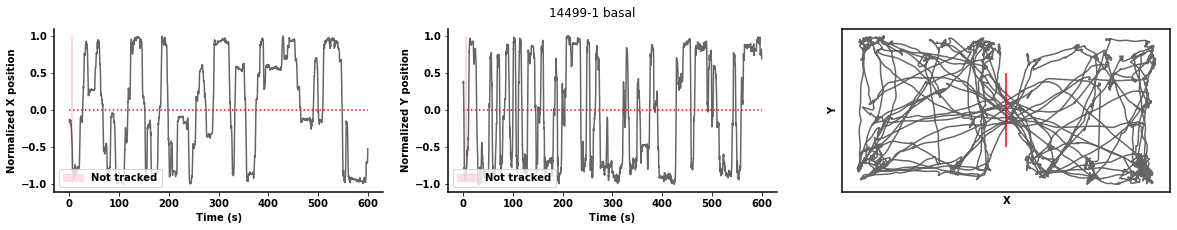

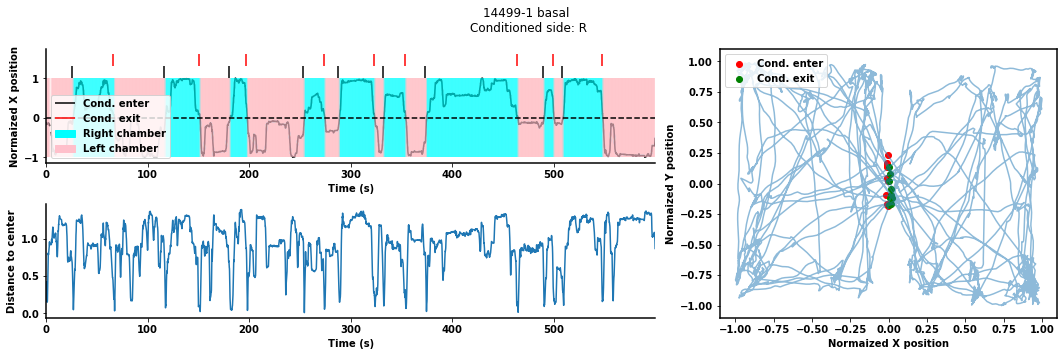

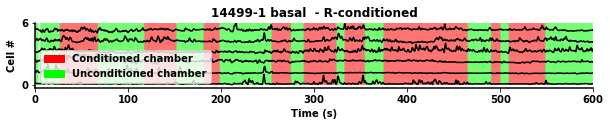

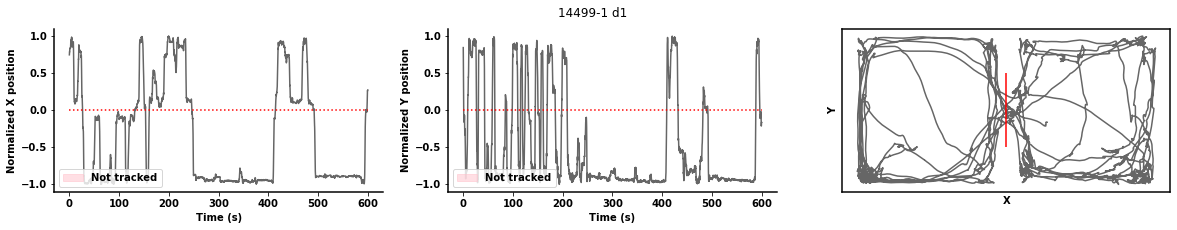

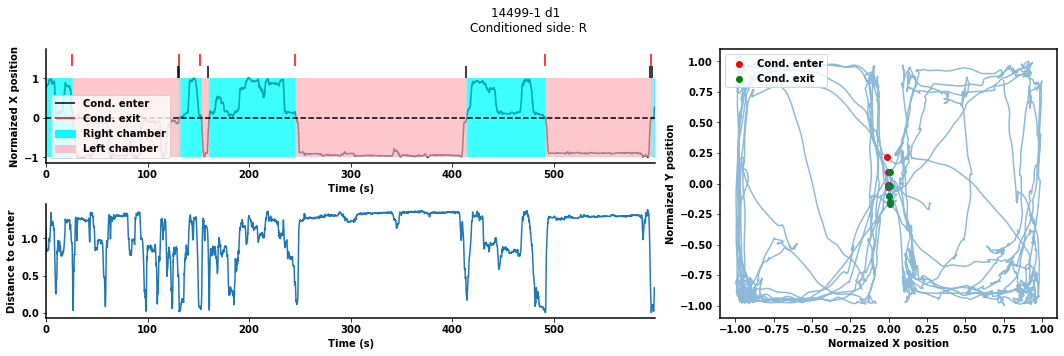

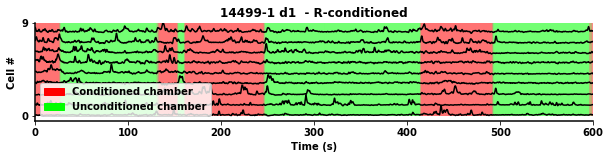

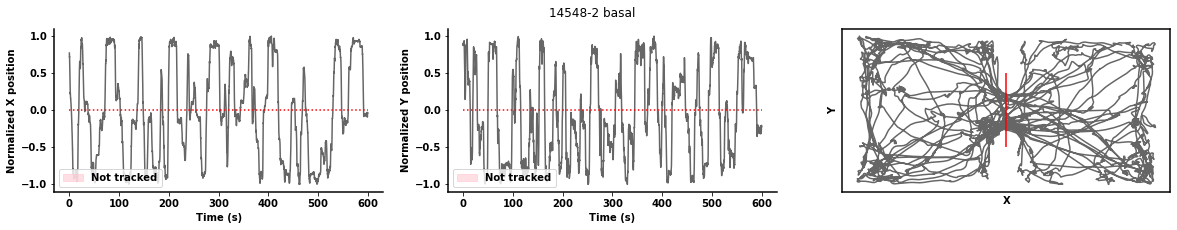

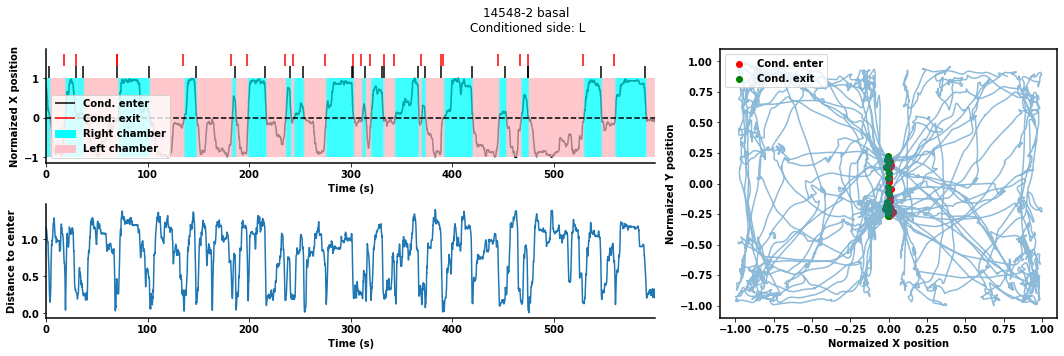

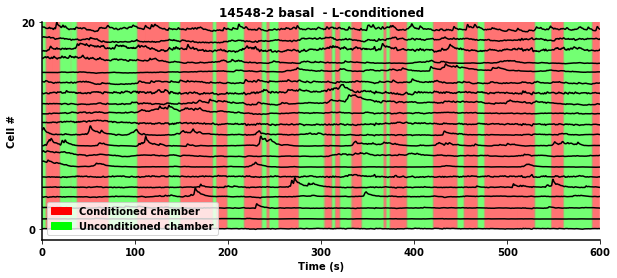

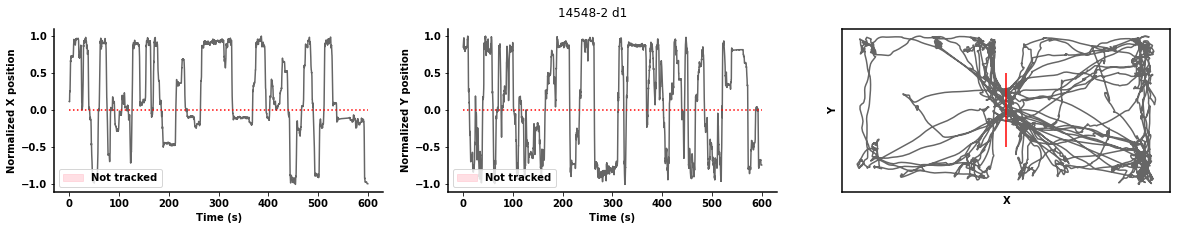

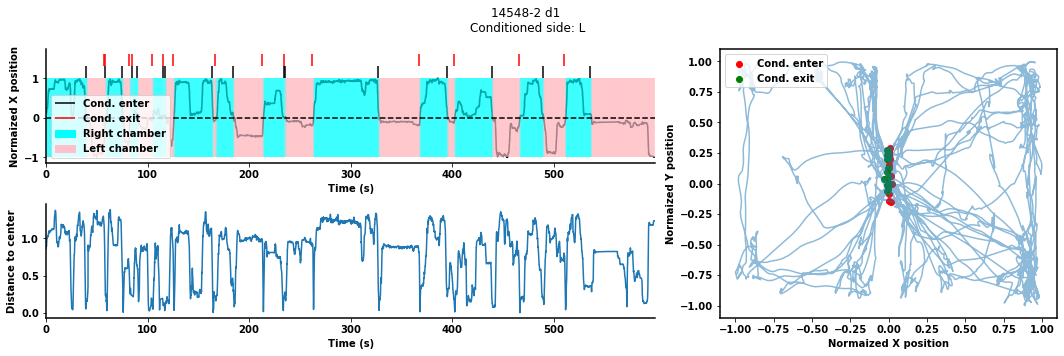

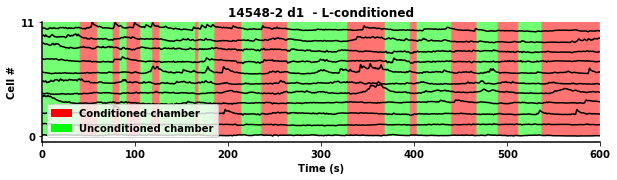

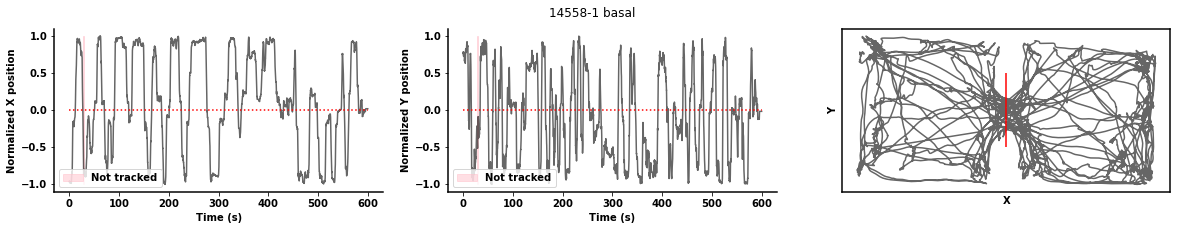

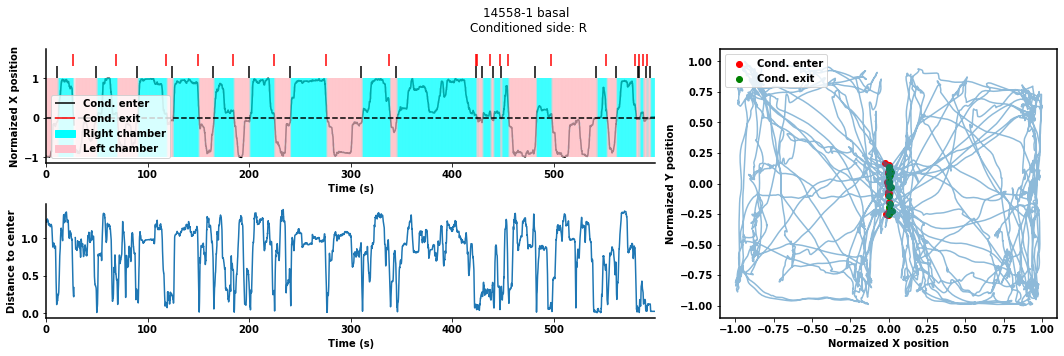

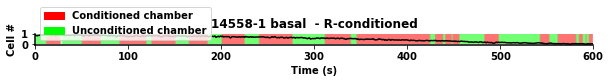

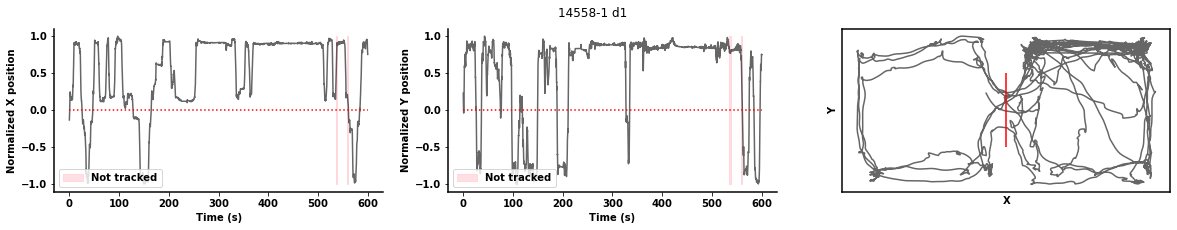

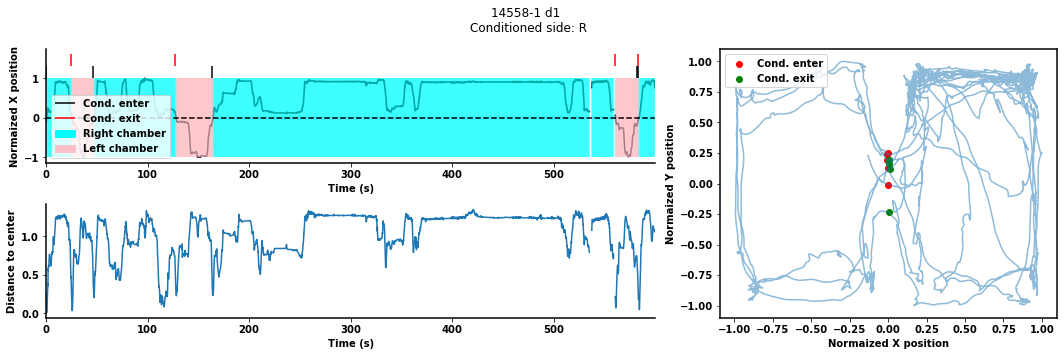

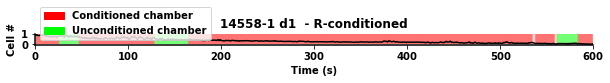

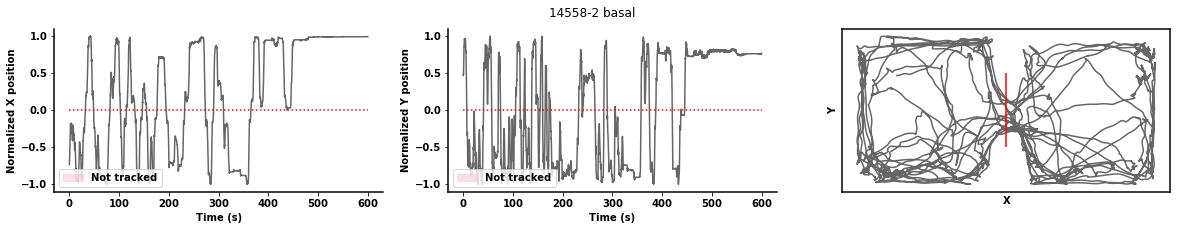

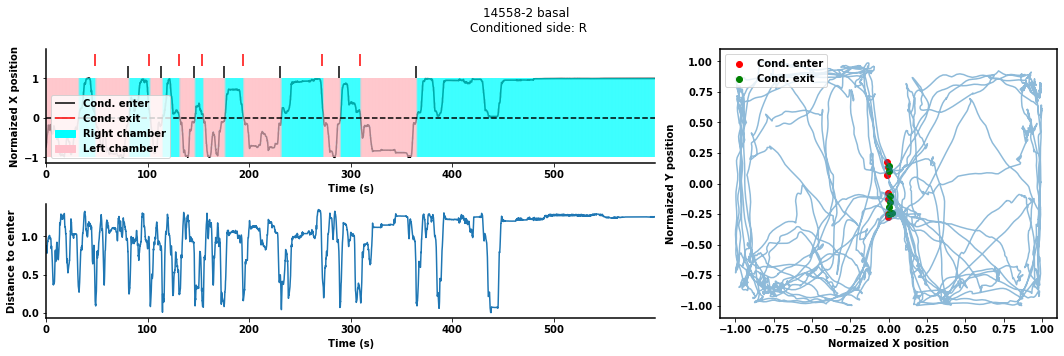

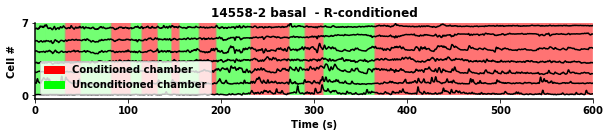

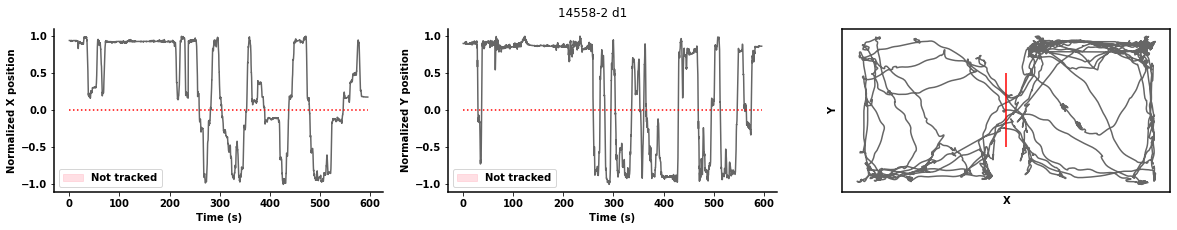

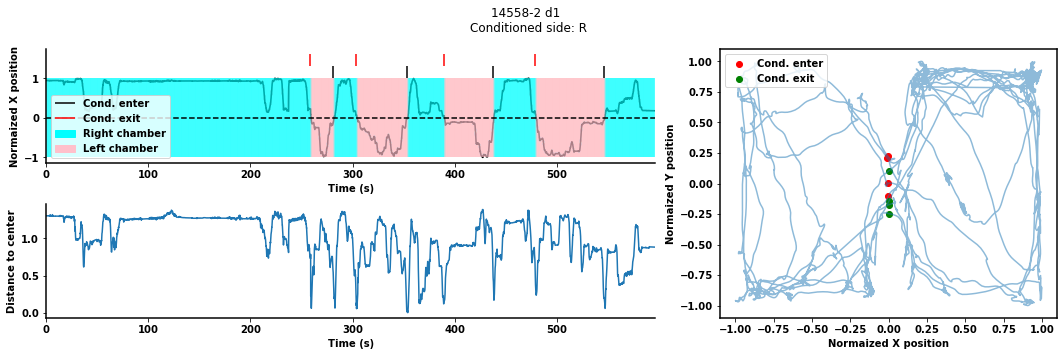

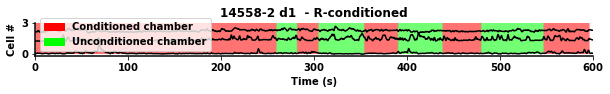

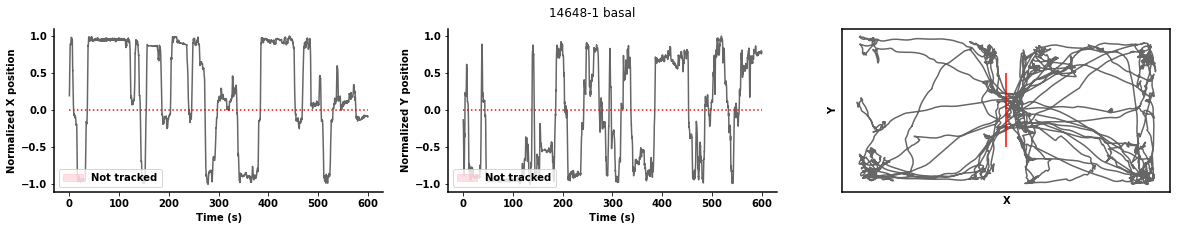

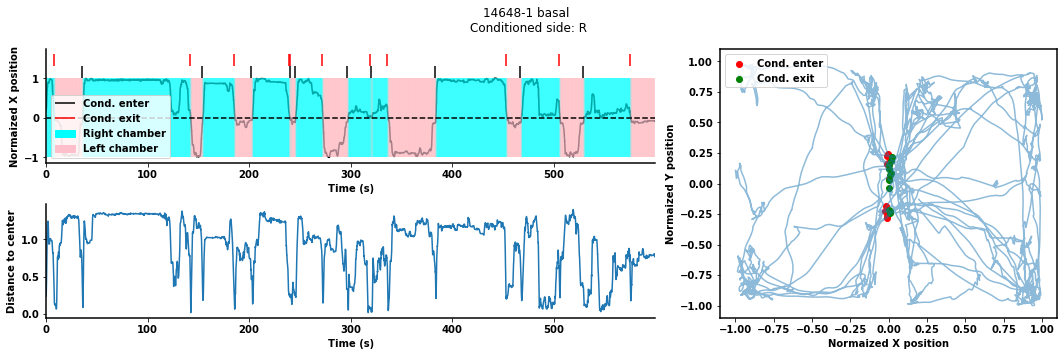

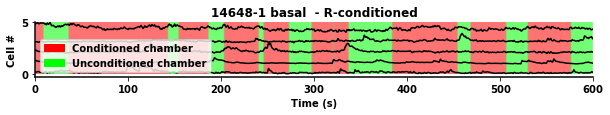

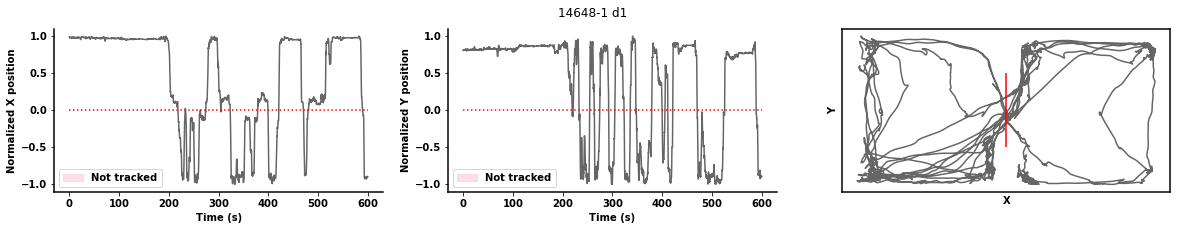

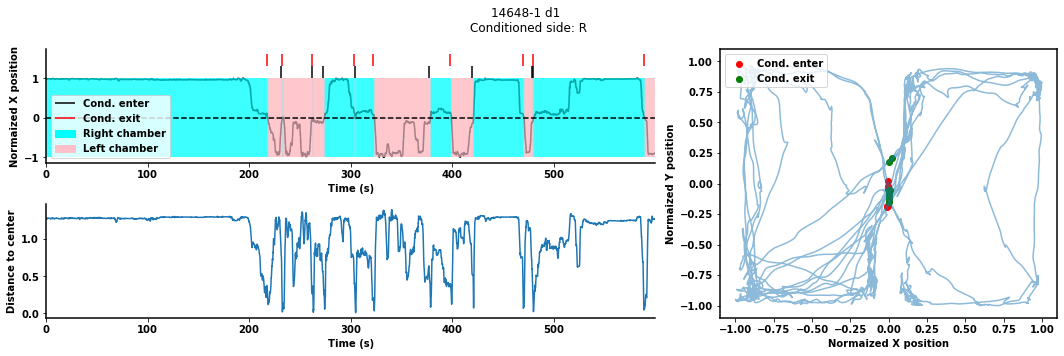

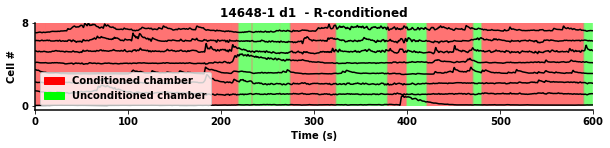

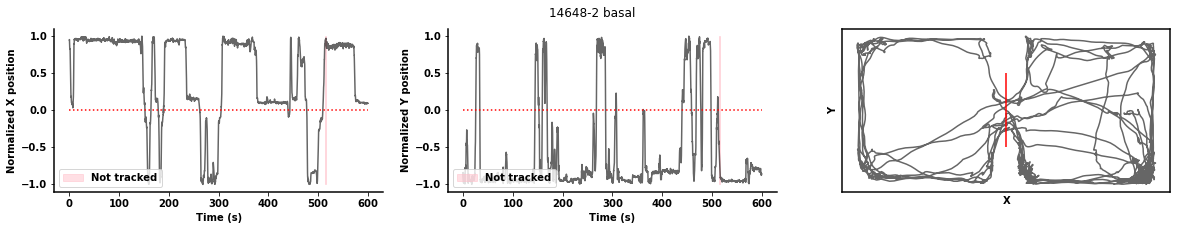

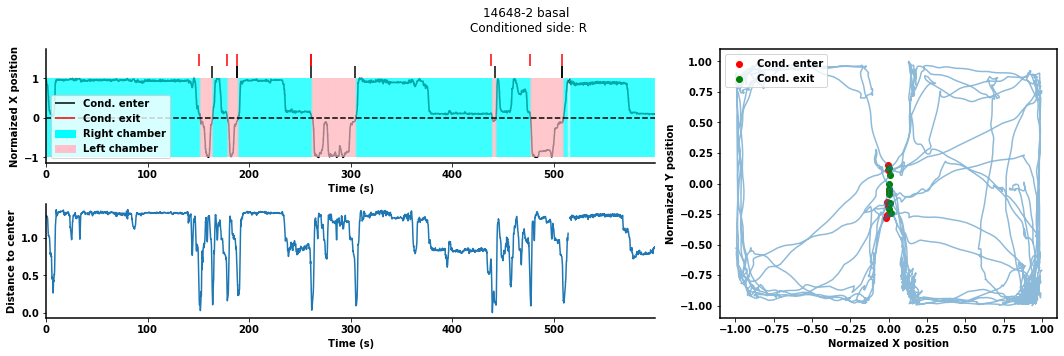

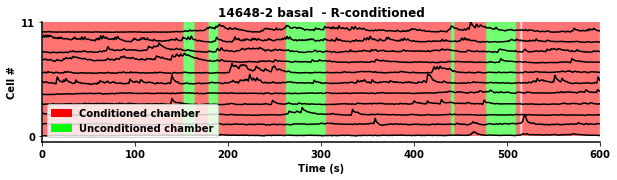

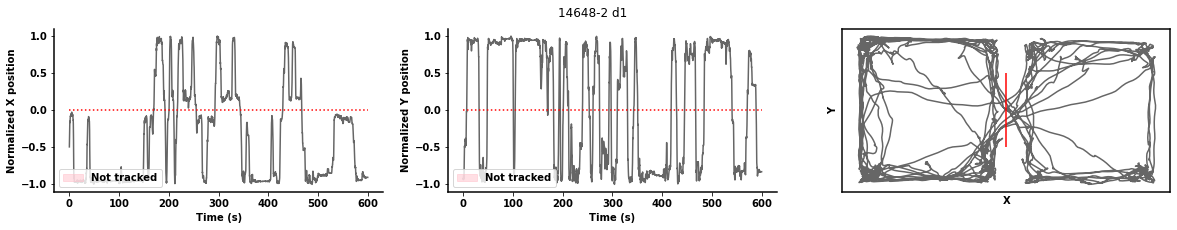

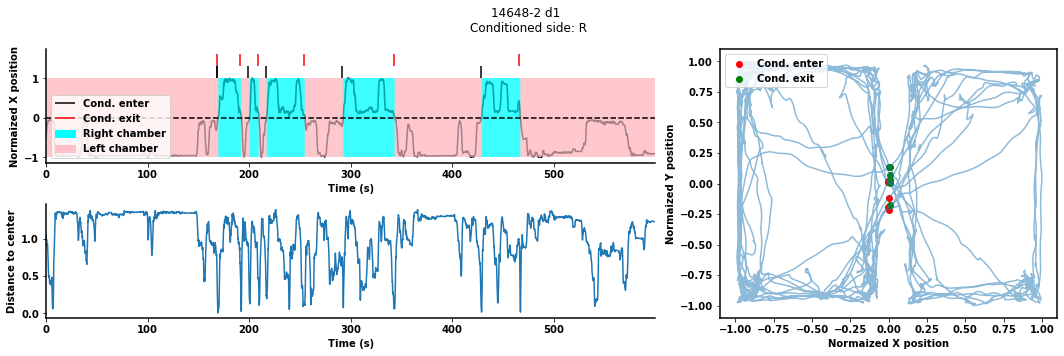

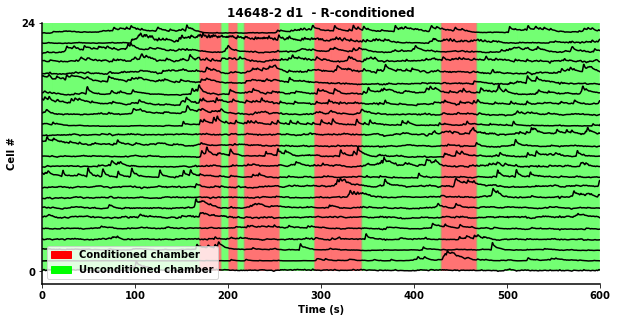

In [25]:
reload(cpp)
cpp.shade_trace_plot(trajpath,formalin_side, file_list_traj,
                      Ca_time, signal, mice, state, start_delay, 
                      Total_duration, cross_boundary, shade_color,
                        raw_plot, save_raw_plot, save_table, save_directory)

## **Generating trajectory-calcium trace pairing quantitative data set**

#### **Edit this block**

In [27]:
#Parameters for crossing-based cell classification  
t_pre, t_post = 5,5 #Pre post time included
sprt = 20 # sampling rate
thr = 2 #threshold for searching responsive events

tracking_source = 'Toxtrac' # 'Toxtrac' or 'ezTrack'
#Parameters for trajectory processing 
start_delay = 20 #s
Total_duration = 600 #length of extracted calcium traces (s)
cross_boundary = [0.1,0.3] #X +- 0.1 / Y +- 0.3

exclude_animal = ['14558-2','14648-1']#List of animals to be excluded from further analysis

raw_plot = False #Plot the trajectory analysis results (missing period detection, side identification, crossing events .etc)
save_raw_plot = False #Save the figures generated in trajectory analysis
save_table = False #Save the trajectory processing results

#Position to save the dictionary file
save_dir = r"/Users/shihchelin/Desktop/test outputs" 
dictionary_name  = 'CPP event-paired stats'

#generate dictionary metadata 
cpp.traj_trace_pair_process(calciumpath, trajpath, tracking_source , formalin_side, t_pre, t_post, sprt, thr,\
                             start_delay, Total_duration, cross_boundary, \
                                exclude_animal, raw_plot, save_raw_plot, save_table, \
                                    save_dir, dictionary_name)

File in process: 14499-1 basal cpp.txt
File in process: 14499-1 d1 cpp.txt
File in process: 14548-2 basal cpp.txt
File in process: 14548-2 d1 cpp.txt
File in process: 14558-1 basal cpp.txt
File in process: 14558-1 d1 cpp.txt
File in process: 14558-2 basal cpp.txt
Animal excluded
File in process: 14558-2 d1 cpp.txt
Animal excluded
File in process: 14648-1 basal cpp.txt
Animal excluded
File in process: 14648-1 d1 cpp.txt
Animal excluded
File in process: 14648-2 basal cpp.txt
File in process: 14648-2 d1 cpp.txt


### **Read in dictionary**

#### **Edit this block**

In [28]:
# Load in dictionary
dictionary_dir = r"/Users/shihchelin/Desktop/test outputs" 
os.chdir(dictionary_dir) #The directory with .pki file (processing results of previous cell)
with open(f'{dictionary_name}.pkl', 'rb') as f: 
    trace_meta = pickle.load(f)

# Data preperation 
state_list = np.unique(trace_meta['State'])
mouse_list = np.unique(trace_meta['Mouse'])
unique_ID = np.array([f"{trace_meta['Cell ID'][i]}_{trace_meta['State'][i]}_{trace_meta['Mouse'][i]}" \
             for i in range(len(trace_meta['Cell ID']))])

## **Classify cells based on averaged activity in certain side**

#### **Edit this block**

In [29]:
#parameters for pei charts & scatter plot
class_text = ['Cond.','Uncond.']
title_prefix = 'Pooled'
save_plot_name = 'pool scatter' # Scatter plot, pei chart, and histogram
class_colors = ['red', 'blue', 'gray']
histogram_color = 'black'
classification_index = 'pref' #"pref" or "diff"
thres = 0.2 #Standard to classify cells

save_name = 'Pref-classified neuron - Heatmap' #For heatmap file

save_plot = True
save_directory = r"/Users/shihchelin/Desktop/test outputs"#Directory you want to save plots 

#### **Do not edit this block**

/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/cpp_processing_script.py:1080: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax = plt.subplot(gs[j,n])
/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/cpp_processing_script.py:1090: RuntimeWarning: Mean of empty slice.
  ax = plt.subplot(gs[3,n])
/Users/shihchelin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/cpp_processing_script.py:1080: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax = plt.subplot(gs[j,n])
/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/cpp_processing_script.py:1090: Runtime

<Figure size 432x288 with 0 Axes>

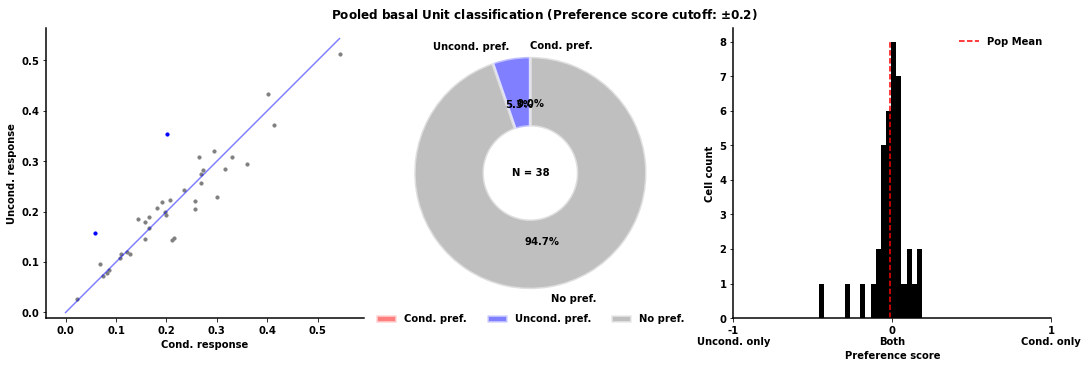

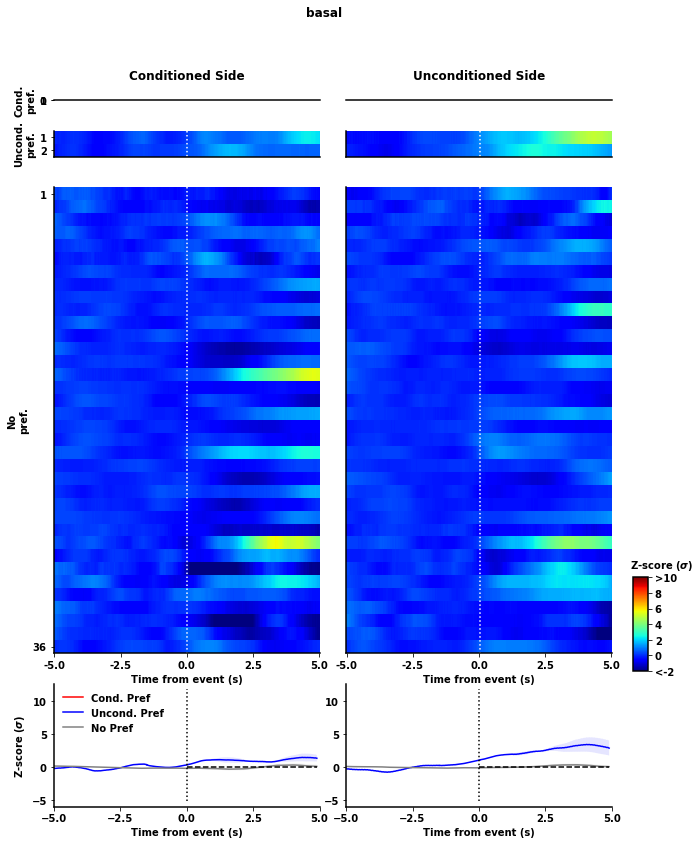

<Figure size 432x288 with 0 Axes>

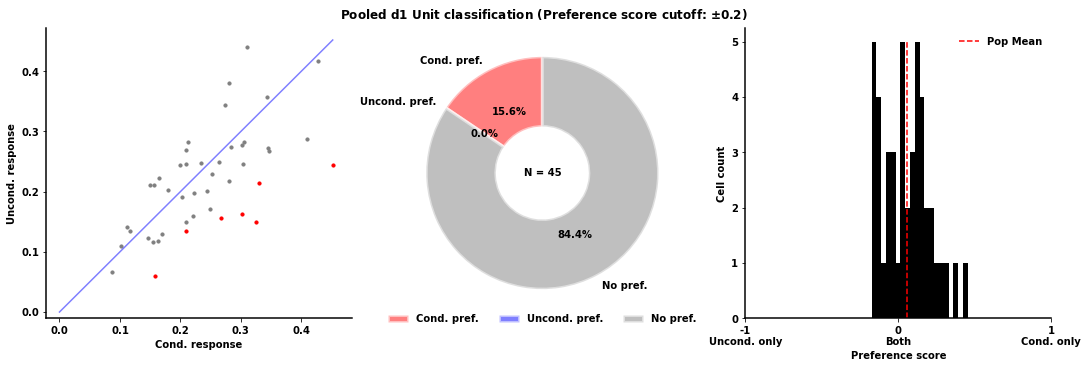

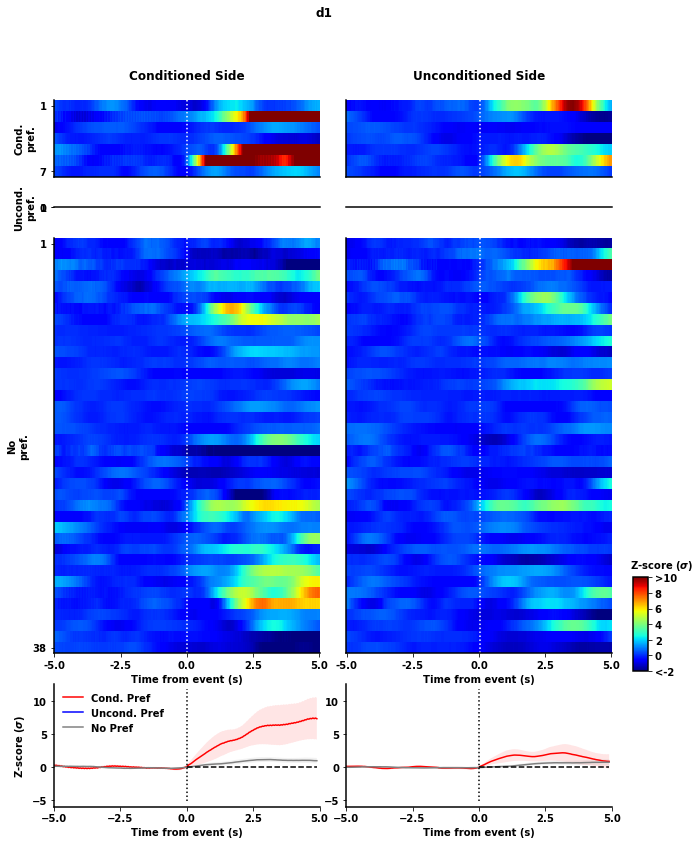

In [30]:
state_list = np.unique(trace_meta['State'])
mouse_list = np.unique(trace_meta['Mouse'])

for i, s in enumerate(state_list):
    match_indx = trace_meta['State'] == s
    [cond_indx, uncond_indx] = [np.where(np.logical_and(trace_meta['Cham'] == side ,match_indx))[0] for side in ['Cond', 'Uncond']]
    [cond_val, uncond_val] =[ trace_meta['Cham mean'][indx]for indx in [cond_indx, uncond_indx]]
    title_prefix_state = f"{title_prefix} {s}"
    plot_name_state = f"{save_plot_name} {s}"
    heatmap_name_state =  f"{save_name} {s}"
    #Plot out triplot
    cell_pref = cpp.triplot(cond_val, uncond_val, thres, class_text, title_prefix_state, plot_name_state, class_colors,histogram_color,classification_index, save_plot, save_directory )
    #plot out heatmap & ave trace
    cpp.pref_class_heatmap(s,trace_meta, cell_pref, cond_indx, uncond_indx,class_colors, heatmap_name_state, save_plot, save_directory)

#### **Output results into .csv file**

In [31]:
a = trace_meta['Cell ID']
b = trace_meta['State']
c = trace_meta['Mouse']
d = trace_meta['Cham']
e = trace_meta['Cham mean']
trace = trace_meta['Extracted trace mean']

#Calibrate difference index
delta = np.tile(np.nan, len(a))
for i in range(int(len(a)/2)):
    [delta[2*i], delta[2*i+1]] = np.repeat([(e[2*i]-e[2*i+1])\
                                            if classification_index == 'diff' else (e[2*i]-e[2*i+1])/(e[2*i]+e[2*i+1]) \
                                            if classification_index  == 'pref' else None][0],2)
#Determine cell class
res_type = [['Cond pref' if d>= thres else 'Uncond pref' if d <= -thres else 'No pref' if abs(d) < thres else None][0] for d in delta]

data_table = np.r_[np.vstack([a,b,c,d,e, delta , res_type]),trace.T]
data_table = np.c_[np.concatenate([['Cell ID', 'State', 'Mouse', 'Cham', 'Cham mean', f'{classification_index} score', 'Cell class'],trace_meta['Trace time']]) ,data_table]

output_df = pd.DataFrame(data_table)
output_df
os.chdir(save_directory)
output_df.to_csv(f'Side mean - output table.csv',header=False, index=False)

## **Classify cells beased on averaged respond to certain crossing events**

### **Data preparation**

#### **Do not edit this block**

In [32]:
state_list = np.unique(trace_meta['State'])
mouse_list = np.unique(trace_meta['Mouse'])

### **Cell response class pie chart - Pooled**

#### **Edit this block**

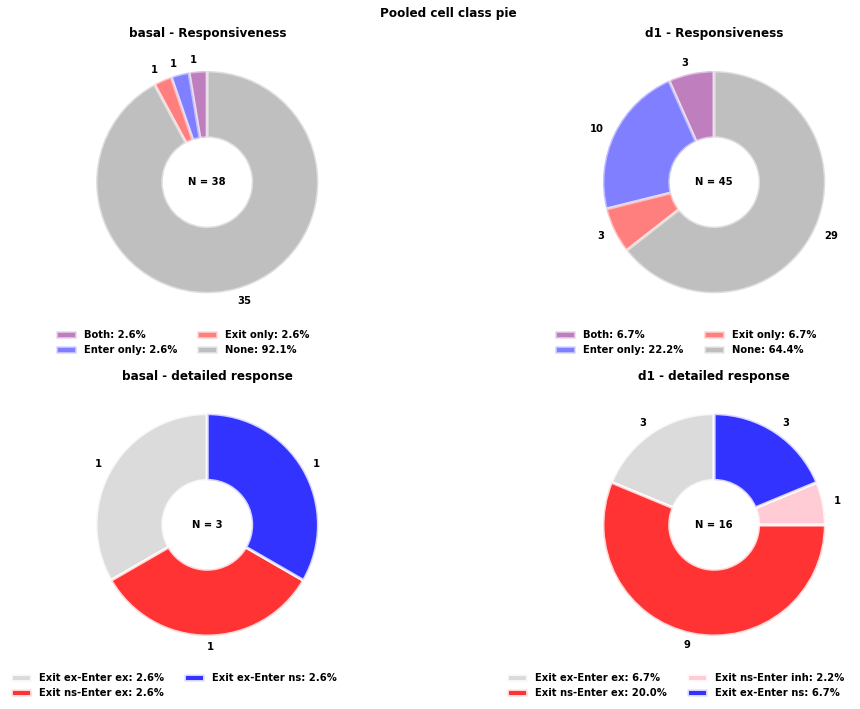

In [33]:
reload(cpp)
pie_color_rough = ['purple','blue','red','gray'] #Both, enter only, exit only, None
pie_color_detial = np.array(['lightgray','firebrick','red','navy','black','pink','blue','cyan'])
plot_name = 'Pooled cell class pie'
save_plot = True
save_directory = r"/Users/shihchelin/Desktop/test outputs"#Directory you want to save plots 

cpp.pool_response_class_pie(trace_meta, state_list, pie_color_rough, pie_color_detial, plot_name, save_plot,save_directory )

### **Cell response type pei chart - individual**

#### **Edit this block**

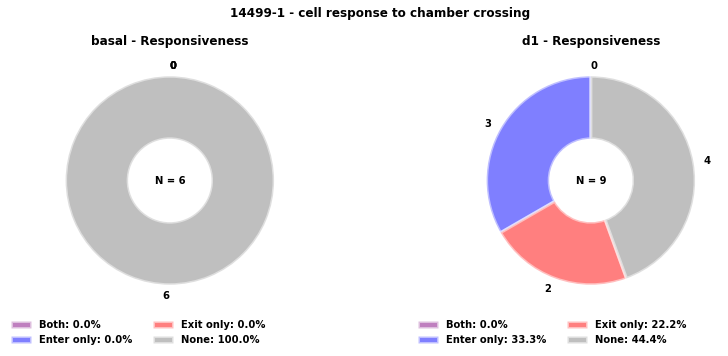

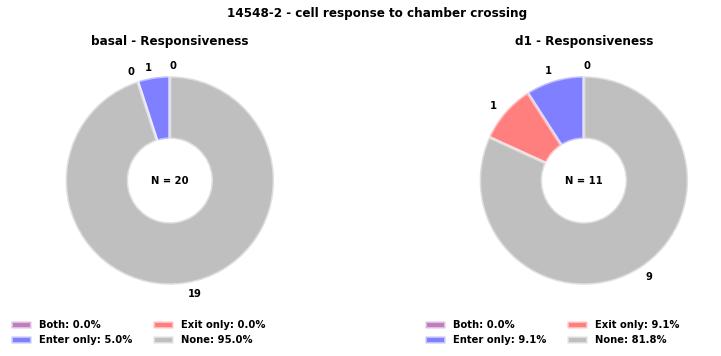

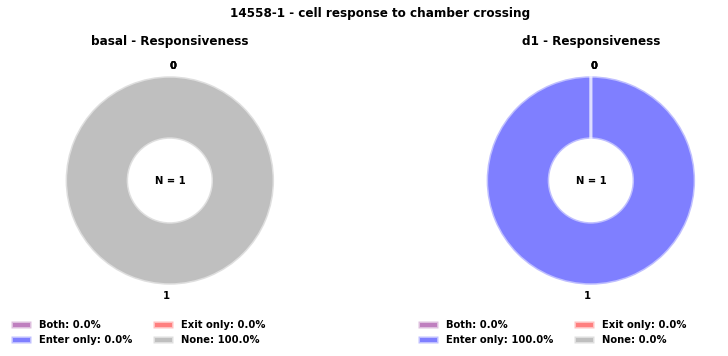

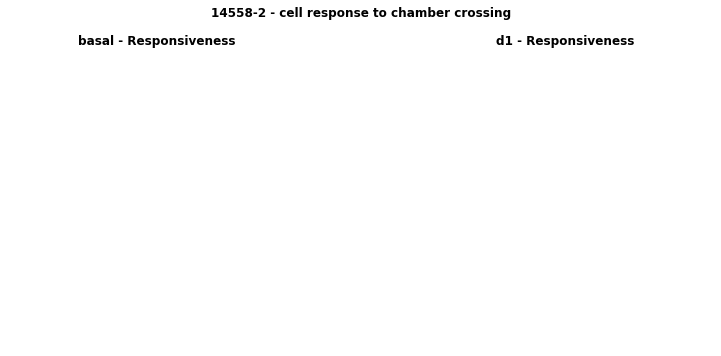

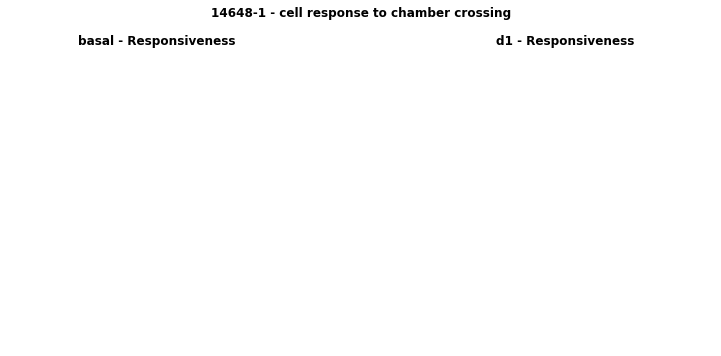

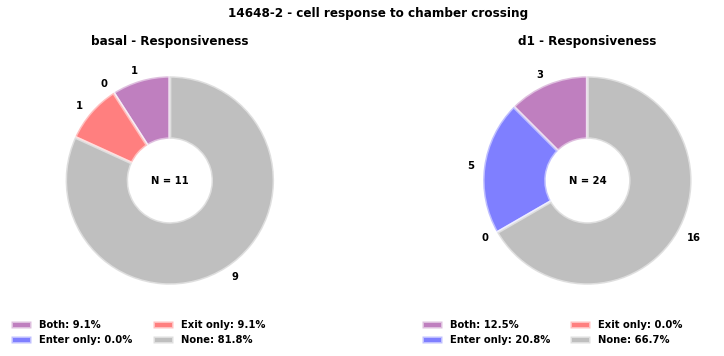

In [35]:
pie_color_rough = ['purple','blue','red','gray'] #Both, enter only, exit only, None
pie_color_detial = np.array(['lightgray','firebrick','red','navy','black','pink','blue','cyan'])
plot_name = 'cell response to chamber crossing'
save_plot = True
save_directory = r"/Users/shihchelin/Desktop/test outputs"#Directory you want to save plots 

cpp.individual_response_class_pie(trace_meta, mice, state_list, pie_color_rough, plot_name, save_plot,save_directory)

### **Plot out crossing-associated responses for different classes of cells with heatmap or averaged traces** 

#### **Edit this block**

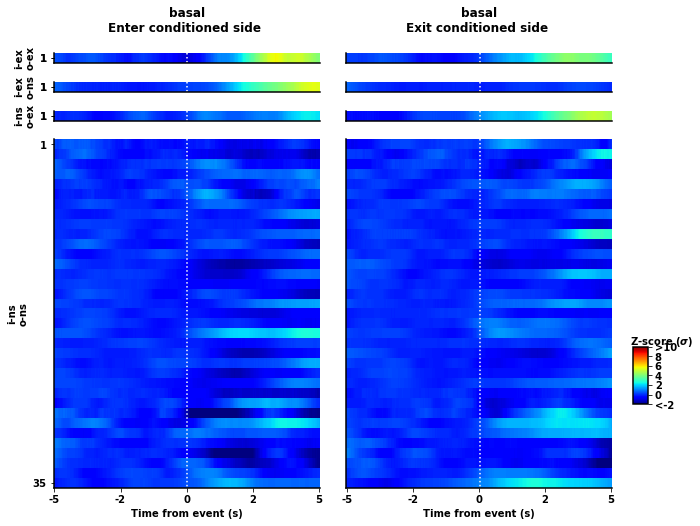

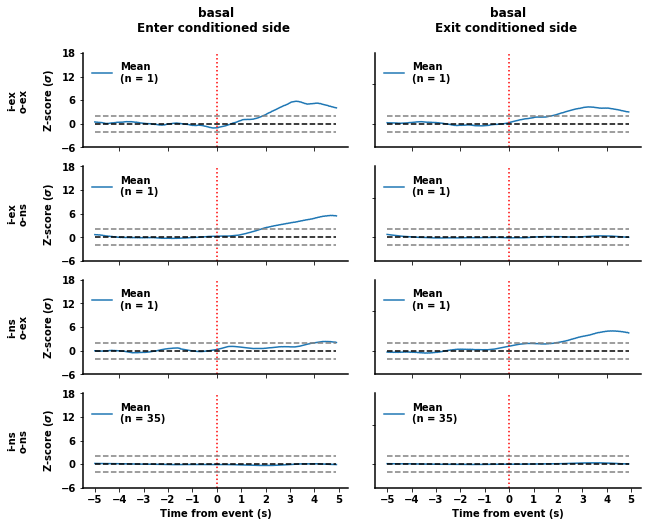

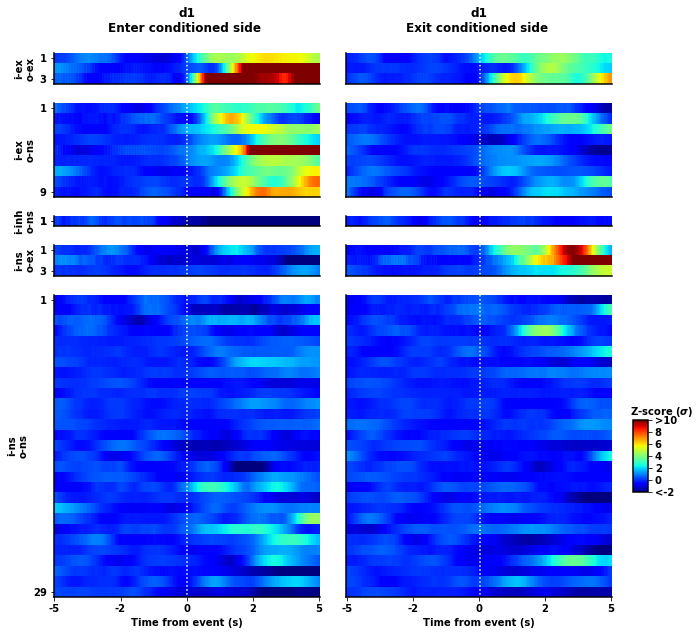

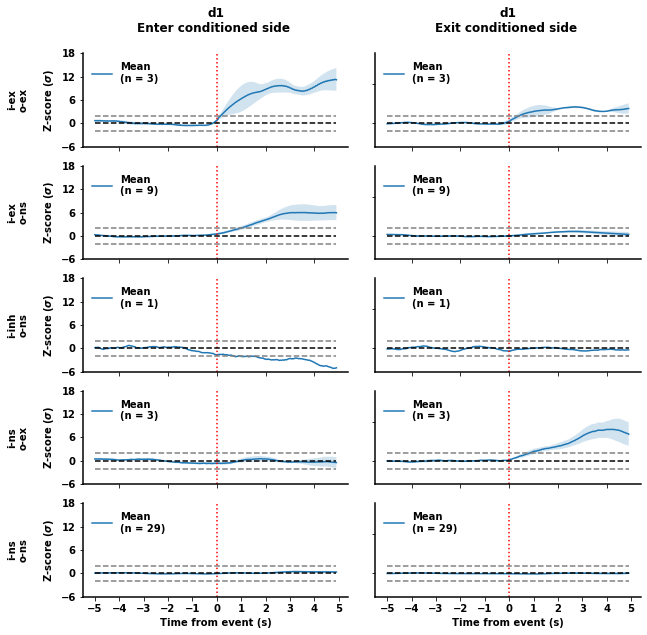

In [38]:
reload(cpp)
threshold = 2
heatmap_save_name = 'Cross response heatmap'
mean_trace_save_name = 'Cross response mean trace'
save_plot = True
save_directory = r"/Users/shihchelin/Desktop/test outputs" #Directory you want to save plots 

cpp.heatmap_trace_plot(trace_meta, state_list,threshold ,heatmap_save_name, mean_trace_save_name, save_plot,save_directory)

#### **Output results into .csv file** 

In [39]:
a = trace_meta['Cell ID']
b = trace_meta['State']
c = trace_meta['Mouse']
d = trace_meta['Cross type']
e = trace_meta['Mean response']
f = trace_meta['Response type']
trace = trace_meta['Extracted trace mean']
data_table = np.r_[np.vstack([a,b,c,d,e,f]),trace.T]
data_table = np.c_[np.concatenate([['Cell ID', 'State', 'Mouse', 'Cross type','Mean response','Response type'],trace_meta['Trace time']]) ,data_table]

output_df = pd.DataFrame(data_table)
output_df
os.chdir(save_dir)
output_df.to_csv(f'Cross-event paired response - output table.csv',header=False, index=False)